In [44]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import time
import datetime
pd.set_option('display.max_rows', 10000, 'display.max_columns', 150)


In [45]:
index_choice = 'sp500'

In [46]:
SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

In [47]:
file_path = os.path.join("temp",f"{index_choice}",f"{index_choice}_final_smoothed.csv")
final_df = pd.read_csv(file_path)
final_df["datetime"] = final_df["date"].apply(lambda s: datetime.datetime.strptime(s, "%Y-%m-%d"))
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219986 entries, 0 to 219985
Columns: 140 entries, date to monthly_rolling_avg_open
dtypes: datetime64[ns](1), float64(109), object(30)
memory usage: 235.0+ MB


In [52]:
def normalize (df):
    min = df.min()
    max = df.max()
    x = df
    y = (x-min) / (max-min)
    return y

In [53]:
industry_choice = ["Airlines","Internet Retail", "Electronic Gaming & Multimedia", "Diagnostics & Research", "Travel Services", "Health Information Services", "Entertainment", "Restaurants", "Food Distribution"]

industry_extract = final_df[final_df["industry"].isin(industry_choice)]

industry_extract["normalized_open"]= industry_extract.groupby("ticker")["open_x"].apply(lambda x: normalize (x))

industry_extract_grouped = industry_extract.groupby(["datetime","industry"]).mean("normalized_open").reset_index()


<AxesSubplot:xlabel='datetime'>

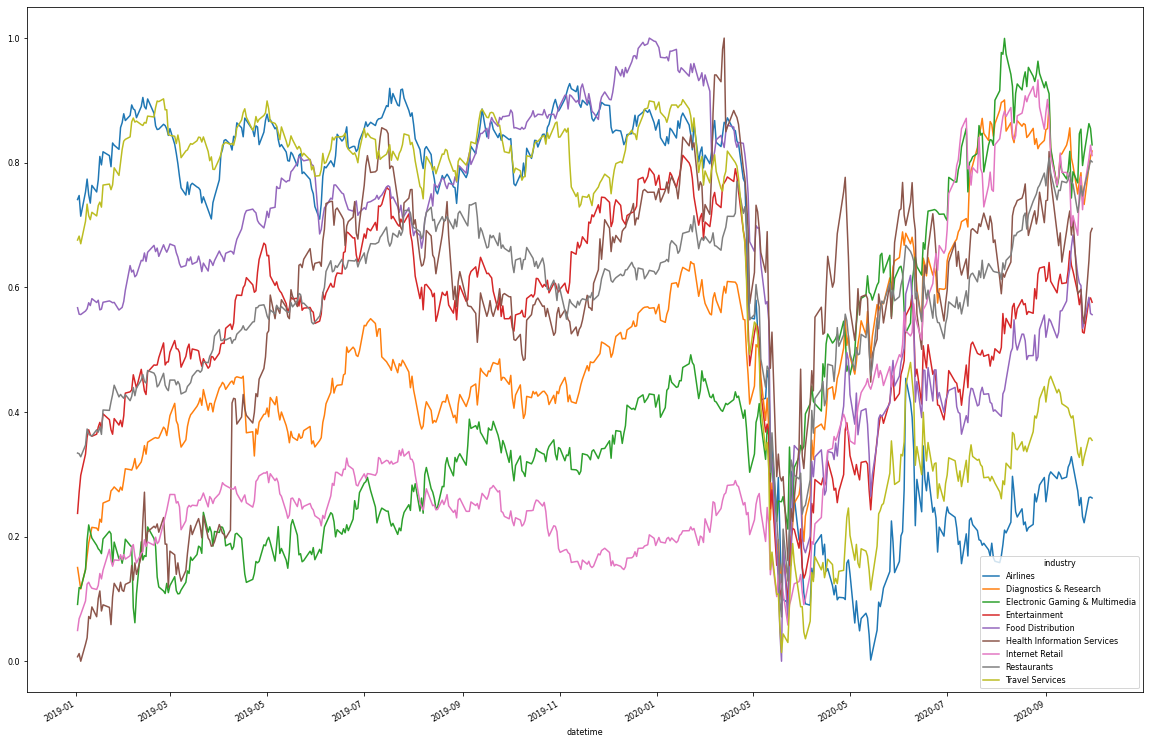

In [54]:
fig, ax = plt.subplots(figsize=(20,14))

p = industry_extract_grouped.pivot(index="datetime", columns="industry", values="normalized_open")

p.plot(ax=ax)

In [55]:
final_df["normalized_open"]= final_df.groupby("ticker")["open_x"].apply(lambda x: normalize (x))

open_by_stock = final_df.pivot(index="datetime", columns="ticker", values="normalized_open")

open_by_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 441 entries, 2019-01-02 to 2020-09-30
Columns: 502 entries, A to ZTS
dtypes: float64(502)
memory usage: 1.7 MB


In [76]:
final_df["normalized_open"]= final_df.groupby("ticker")["open_x"].apply(lambda x: normalize (x))

open_by_industry = final_df.groupby(["datetime","industry"]).mean("normalized_open").reset_index()

open_by_industry = open_by_industry.pivot(index="datetime", columns="industry", values="normalized_open")

open_by_stock_industry = open_by_stock.merge(open_by_industry, how = "left", left_on= "datetime", right_on="datetime")

open_by_stock_industry.head()


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,APA,APD,APH,APTV,ARE,ATO,ATVI,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BAC,BAX,BBY,BDX,BEN,BIIB,BIO,BK,BKNG,BKR,BLK,BLL,BMY,BR,BSX,BWA,BXP,C,CAG,...,Farm & Heavy Construction Machinery,Farm Products,Financial Data & Stock Exchanges,Food Distribution,Footwear & Accessories,"Furnishings, Fixtures & Appliances",Gold,Grocery Stores,Health Information Services,Healthcare Plans,Home Improvement Retail,Household & Personal Products,Industrial Distribution,Information Technology Services,Insurance Brokers,Insurance—Diversified,Insurance—Life,Insurance—Property & Casualty,Insurance—Reinsurance,Insurance—Specialty,Integrated Freight & Logistics,Internet Content & Information,Internet Retail,Leisure,Lodging,Luxury Goods,Medical Care Facilities,Medical Devices,Medical Distribution,Medical Instruments & Supplies,Oil & Gas E&P,Oil & Gas Equipment & Services,Oil & Gas Integrated,Oil & Gas Midstream,Oil & Gas Refining & Marketing,Packaged Foods,Packaging & Containers,Personal Services,Pharmaceutical Retailers,REIT—Healthcare Facilities,REIT—Hotel & Motel,REIT—Industrial,REIT—Office,REIT—Residential,REIT—Retail,REIT—Specialty,Railroads,Real Estate Services,Rental & Leasing Services,Residential Construction,Resorts & Casinos,Restaurants,Scientific & Technical Instruments,Security & Protection Services,Semiconductor Equipment & Materials,Semiconductors,Software—Application,Software—Infrastructure,Specialty Business Services,Specialty Chemicals,Specialty Industrial Machinery,Specialty Retail,Staffing & Employment Services,Steel,Telecom Services,Tobacco,Tools & Accessories,Travel Services,Trucking,Utilities—Diversified,Utilities—Independent Power Producers,Utilities—Regulated Electric,Utilities—Regulated Gas,Utilities—Regulated Water,Waste Management
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.077873,0.809201,0.754624,0.026847,0.744429,0.076460,0.799556,0.112688,0.007571,0.000221,0.058945,0.589408,0.283262,0.007702,0.082641,0.107324,0.409794,0.607255,0.513718,0.596107,0.138511,0.097301,0.010109,0.487917,0.325124,0.748854,0.180768,0.000000,0.327227,0.000000,0.580205,0.006016,0.144457,0.272375,0.170710,0.004465,0.000000,0.272811,0.003250,0.556861,0.004697,0.357534,0.647165,0.020808,0.299788,0.412785,0.044774,0.242659,0.104003,0.456391,0.404957,0.106068,0.029240,0.334586,0.216287,0.626159,0.293187,0.033817,0.025214,0.210597,0.686884,0.615631,0.017053,0.707887,0.567840,0.613092,0.145116,0.020368,0.339841,0.126856,0.411551,0.552140,0.514593,0.327167,0.015978,...,0.321325,0.386035,0.161061,0.567287,0.122268,0.326305,0.106989,0.422265,0.007175,0.457827,0.195230,0.176977,0.212245,0.201965,0.031663,0.500733,0.563027,0.315917,0.413363,0.138511,0.320433,0.065453,0.049341,0.221565,0.380609,0.397720,0.455836,0.283423,0.190188,0.139199,0.656787,0.667839,0.687327,0.547874,0.681317,0.245963,0.443630,0.171089,0.837887,0.581825,0.656783,0.182403,0.420435,0.397275,0.637189,0.183845,0.316209,0.248286,0.281361,0.157845,0.499900,0.334064,0.216527,0.000000,0.024587,0.114833,0.025412,0.138762,0.012988,0.361301,0.261387,0.381704,0.414420,0.660573,0.210120,0.435805,0.519997,0.675935,0.001113,0.392498,0.802203,0.231495,0.511597,0.029240,0.047741
2019-01-03,0.053427,0.817404,0.773864,0.000000,0.674631,0.086996,0.761756,0.078758,0.009441,0.003287,0.035092,0.601936,0.274337,0.016007,0.017027,0.057399,0.402921,0.631645,0.527309,0.553702,0.158527,0.072047,0.000000,0.509792,0.298263,0.756565,0.176854,0.033649,0.390900,0.019135,0.580205,0.011379,0.146091,0.268390,0.208646,0.000000,0.026328,0.275062,0.007754,0.542646,0.001815,0.398173,0.692469,0.032187,0.269214,0.421461,0.000000,0.178057,0.129210,0.423174,0.383564,0.123087,0.000000,0.348364,0.229370,0.635662,0.345499,0.000000,0.032734,0.1

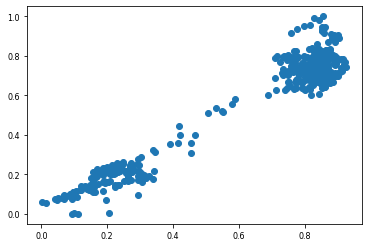

In [77]:
plt.scatter("Airlines", "BA", data=open_by_stock_industry)
